# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Getting the data

In [2]:
df=pd.read_csv("C:/Users/Aashika jain/Documents/Movie_Id_Titles.txt",header=None)
df.to_csv('moviei.csv',index=None)

In [3]:
df.head()

,0,1
0,item_id,title
1,1,Toy Story (1995)
2,2,GoldenEye (1995)
3,3,Four Rooms (1995)
4,4,Get Shorty (1995)


In [4]:
column_ = ['item_id', 'title']
df3 = pd.read_csv('moviei.csv', names=column_)
df3=df3.iloc[2:,:]
df3.head()
df3.info()
df3['item_id']=df3['item_id'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 2 to 1683
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   object
 1   title    1682 non-null   object
dtypes: object(2)
memory usage: 26.4+ KB


In [5]:
df1=pd.read_csv("C:/Users/Aashika jain/Documents/u.txt",header=None)
df1.to_csv('data.csv',index=None)

In [6]:
df1.head()

,0
0,0\t50\t5\t881250949
1,0\t172\t5\t881250949
2,0\t133\t1\t881250949
3,196\t242\t3\t881250949
4,186\t302\t3\t891717742


In [7]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df2 = pd.read_csv('data.csv', sep='\t', names=column_names)
df2=df2.iloc[2:,:]
df2['item_id']=df2['item_id'].astype(int)

In [8]:
df2.head()

,user_id,item_id,rating,timestamp
2,0,172,5.0,881250949.0
3,0,133,1.0,881250949.0
4,196,242,3.0,881250949.0
5,186,302,3.0,891717742.0
6,22,377,1.0,878887116.0


__Merging two dataset together__

In [9]:
df2 = pd.merge(df2,df3,on='item_id')
df2.head()

,user_id,item_id,rating,timestamp,title
0,0,172,5.0,881250949.0,"Empire Strikes Back, The (1980)"
1,213,172,5.0,878955442.0,"Empire Strikes Back, The (1980)"
2,92,172,4.0,875653271.0,"Empire Strikes Back, The (1980)"
3,77,172,3.0,884752562.0,"Empire Strikes Back, The (1980)"
4,194,172,3.0,879521474.0,"Empire Strikes Back, The (1980)"


# Exploratory data analysis


Let's explore the data a bit and get a look at some of the best rated movies.

__Visualization Imports__

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

__Creating ratings dataframe__

In [11]:
df2.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [12]:
df2.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(df2.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


__Now set the number of ratings column:__

In [14]:
ratings['num of ratings'] = pd.DataFrame(df2.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


__Few histograms__

<AxesSubplot:>

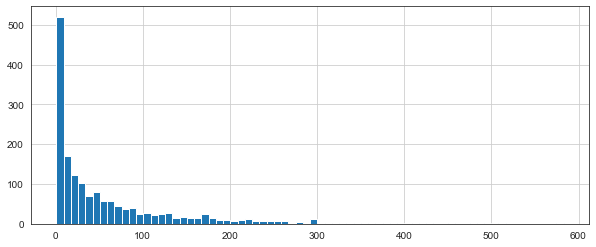

In [15]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

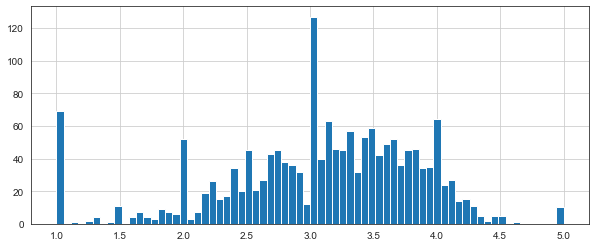

In [16]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

# Recommending similar movies

In [17]:
moviemat = df2.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Most rated movies__

In [18]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


__Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.__

In [19]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [20]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

__We can then use corrwith() method to get correlations between two pandas series:__

In [21]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [22]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


__Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).__

In [23]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


In [24]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [25]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


__Now the same for the comedy Liar Liar:__

In [26]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
